## Ejercicio de aprendizaje no supervisado

In [67]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [71]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("C:/Users/DANIEL/OneDrive/Documentos/UNAD/sexto semestre/Analisis de datos/UNIDAD 1/Tarea4/Mall_Customers.csv")
dataset.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [27]:
dataset.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Text(0.5, 1.0, 'identificacion de datos faltantes y atipicos')

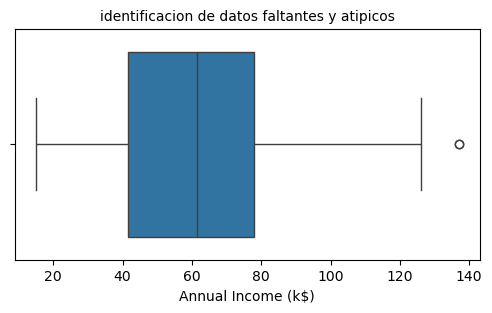

In [73]:
plt.figure(figsize=(6,3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion de datos faltantes y atipicos')

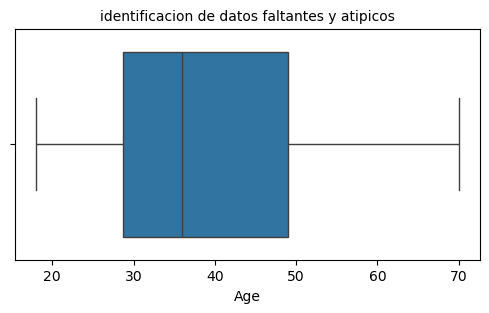

In [75]:
plt.figure(figsize=(6,3))
sns.boxplot(x=dataset['Age'])
plt.title('identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'identificacion de datos faltantes y atipicos')

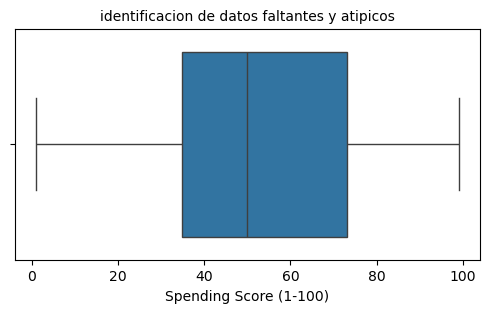

In [77]:
plt.figure(figsize=(6,3))
sns.boxplot(x=dataset['Spending Score (1-100)'])
plt.title('identificacion de datos faltantes y atipicos', fontsize=10)

In [9]:
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [83]:
dataset=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [85]:
dataset.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


Text(0.5, 1.0, 'Grupos de clientes')

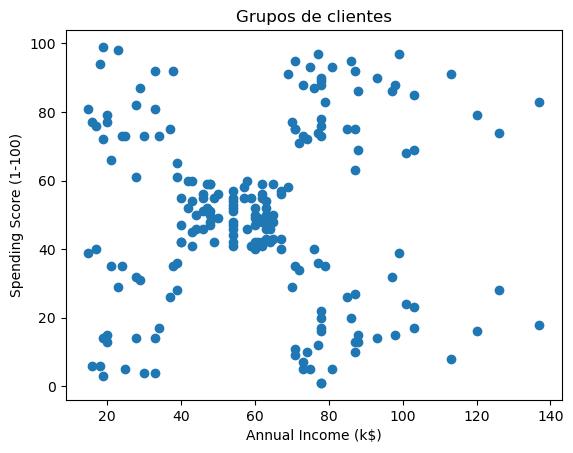

In [87]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')

## K-MEANS

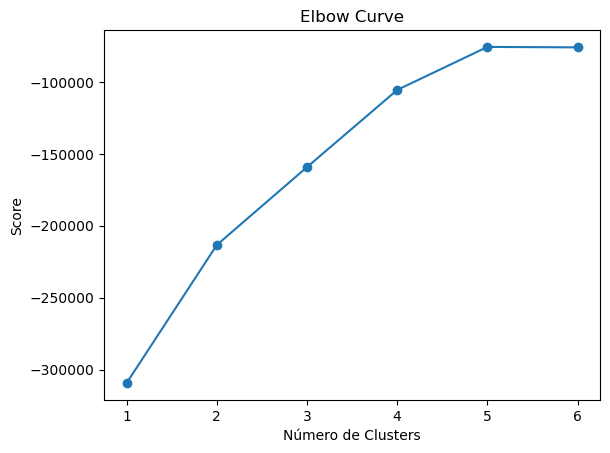

In [112]:
Nc = range(1, 7)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [136]:
Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(dataset)

KMeans(n_clusters=9, random_state=0)

In [138]:
Modelo.labels_
dataset["Grupo"]=Modelo.labels_
print (dataset)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      8
1     21                  15                      81      6
2     20                  16                       6      4
3     23                  16                      77      6
4     31                  17                      40      8
..   ...                 ...                     ...    ...
195   35                 120                      79      2
196   45                 126                      28      5
197   32                 126                      74      2
198   32                 137                      18      5
199   30                 137                      83      2

[200 rows x 4 columns]


In [140]:
observaciones=len(dataset)
x=dataset.drop('Grupo',axis=1)
clusters=dataset['Grupo']

sil_score=silhouette_score(x,clusters)
calinski_score=calinski_harabasz_score(x,clusters)
davies_score=davies_bouldin_score(x,clusters)

table_dataset=[
    ["Numero de observaciones",observaciones],
    ["Coeficiente silhouette",sil_score],
    ["Indice de calinski harabasz",calinski_score],
    ["Indice Davies bouldin", davies_score]
]
from tabulate import tabulate
print(tabulate(table_dataset,headers=["Metric","Value"],tablefmt='pretty'))

+-----------------------------+---------------------+
|           Metric            |        Value        |
+-----------------------------+---------------------+
|   Numero de observaciones   |         200         |
|   Coeficiente silhouette    | 0.41197801912451715 |
| Indice de calinski harabasz |  157.6191976572372  |
|    Indice Davies bouldin    | 0.8921710214929777  |
+-----------------------------+---------------------+


Text(0.5, 1.0, 'Grupos de clientes')

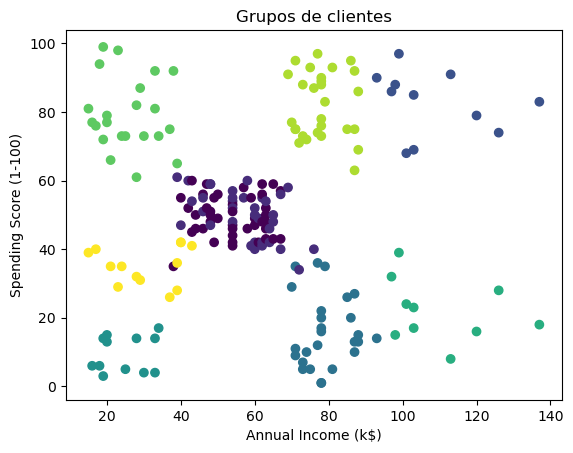

In [142]:
plt.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],c=dataset['Grupo'],cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de clientes')